<a href="https://colab.research.google.com/github/Chinmayisr/mllab/blob/main/mlLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOM METRIC RESULTS:
TP: 106, TN: 61, FP: 2, FN: 2
Accuracy: 0.9766
Precision: 0.9815
Recall (Sensitivity): 0.9815
F1-Score: 0.9815
Specificity: 0.9683
Negative Predictive Value (NPV): 0.9683
Matthews Correlation Coefficient (MCC): 0.9497

SCIKIT-LEARN METRIC RESULTS:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815
Specificity: 0.9683
Negative Predictive Value (NPV): 0.9683
Matthews Correlation Coefficient (MCC): 0.9497


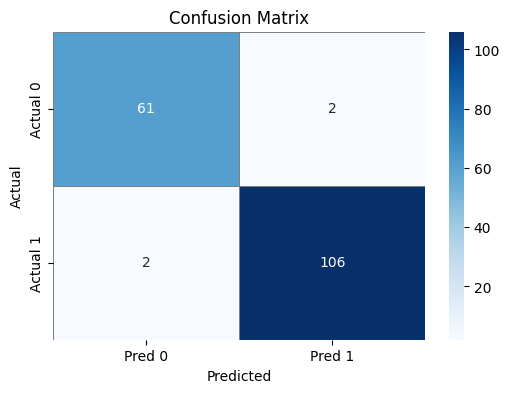

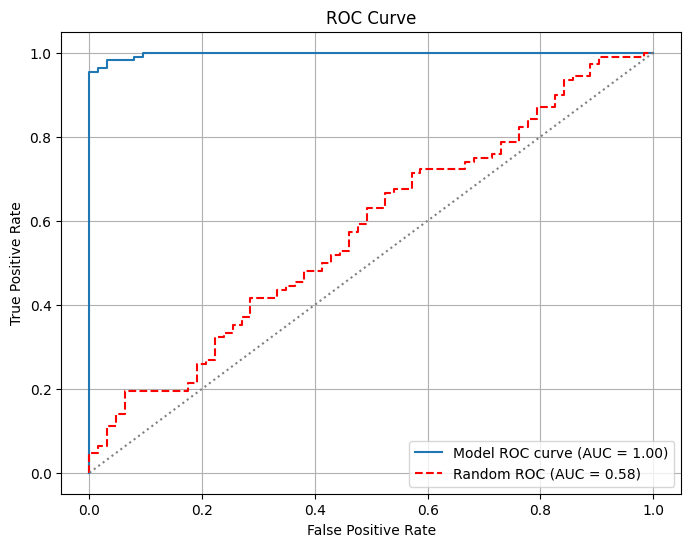


AUC Score of model predictions: 0.9976
AUC Score of random probabilities: 0.5767


In [11]:
#1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_curve, auc, roc_auc_score
)

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ---------------------------------------
# Custom Metric Calculations
# ---------------------------------------

def get_confusion_elements(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return TP, TN, FP, FN

def accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

def precision(TP, FP):
    return TP / (TP + FP) if TP + FP != 0 else 0

def recall(TP, FN):
    return TP / (TP + FN) if TP + FN != 0 else 0

def f1(prec, rec):
    return 2 * (prec * rec) / (prec + rec) if prec + rec != 0 else 0

def specificity(TN, FP):
    return TN / (TN + FP) if TN + FP != 0 else 0

def npv(TN, FN):
    return TN / (TN + FN) if TN + FN != 0 else 0

def custom_mcc(TP, TN, FP, FN):
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    return numerator / denominator if denominator != 0 else 0


# ---------------------------------------
# Custom Results
# ---------------------------------------

TP, TN, FP, FN = get_confusion_elements(y_test, y_pred)
custom_accuracy = accuracy(TP, TN, FP, FN)
custom_precision = precision(TP, FP)
custom_recall = recall(TP, FN)
custom_f1 = f1(custom_precision, custom_recall)
custom_specificity = specificity(TN, FP)
custom_npv = npv(TN, FN)
custom_mcc_value = custom_mcc(TP, TN, FP, FN)

print("CUSTOM METRIC RESULTS:")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Accuracy: {custom_accuracy:.4f}")
print(f"Precision: {custom_precision:.4f}")
print(f"Recall (Sensitivity): {custom_recall:.4f}")
print(f"F1-Score: {custom_f1:.4f}")
print(f"Specificity: {custom_specificity:.4f}")
print(f"Negative Predictive Value (NPV): {custom_npv:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {custom_mcc_value:.4f}")


# ---------------------------------------
# sklearn results
# ---------------------------------------
print("\nSCIKIT-LEARN METRIC RESULTS:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Specificity: {specificity(TN, FP):.4f}")
print(f"Negative Predictive Value (NPV): {npv(TN, FN):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {matthews_corrcoef(y_test, y_pred):.4f}")

# ---------------------------------------
# Confusion Matrix - Gradient Heatmap
# ---------------------------------------
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=['Pred 0', 'Pred 1'],
    yticklabels=['Actual 0', 'Actual 1'],
    cbar=True,
    linewidths=0.5, linecolor='gray'
)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ROC and AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Random probabilities
random_probs = np.random.uniform(0, 1, size=len(y_test))
fpr_random, tpr_random, _ = roc_curve(y_test, random_probs)
roc_auc_random = auc(fpr_random, tpr_random)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Model ROC curve (AUC = {roc_auc:.2f})")
plt.plot(fpr_random, tpr_random, linestyle='--', label=f"Random ROC (AUC = {roc_auc_random:.2f})", color='red')
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------
# AUC Score Results
# ---------------------------------------
print(f"\nAUC Score of model predictions: {roc_auc:.4f}")
print(f"AUC Score of random probabilities: {roc_auc_random:.4f}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

classification report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


accuracy score
 0.9777777777777777

 export tre

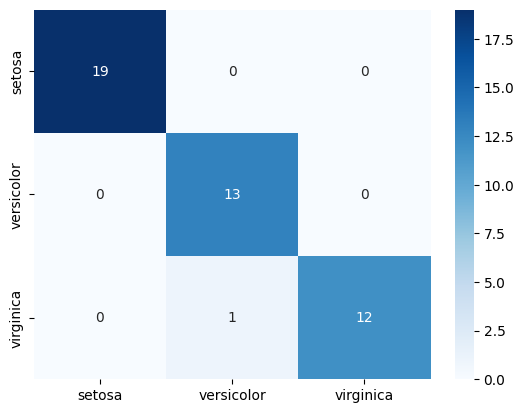

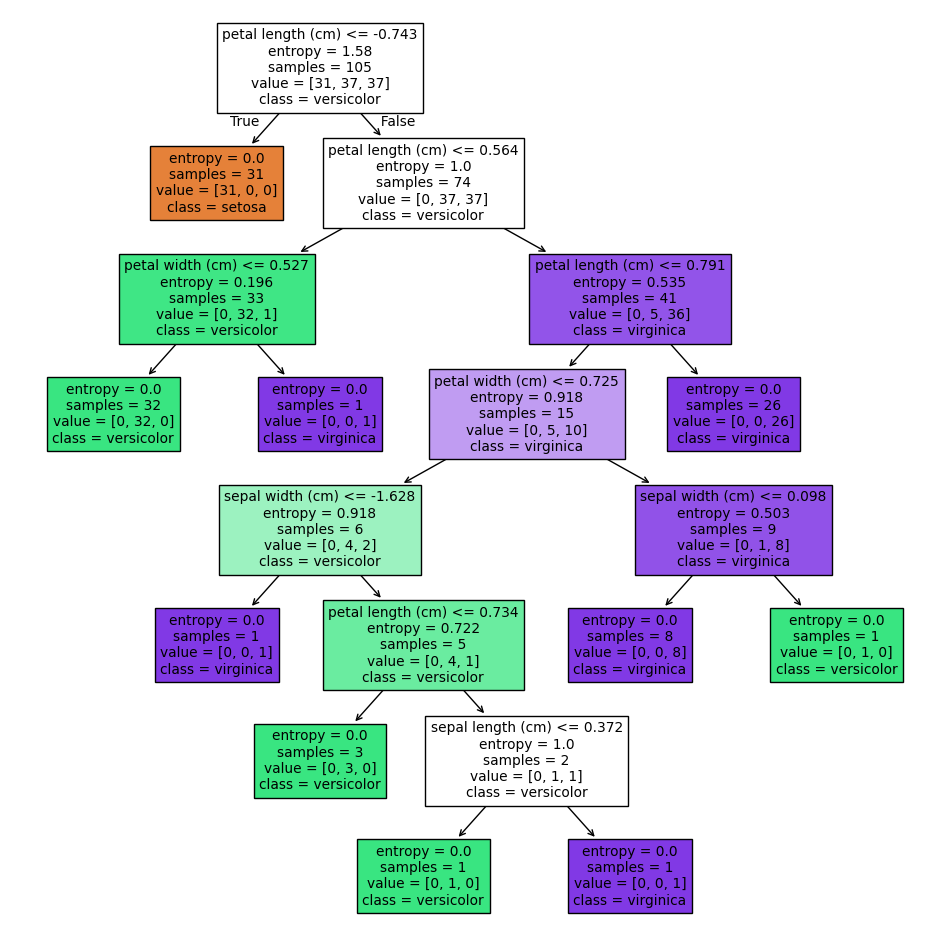


predictions for the sample : [[6, 4, 2, 0.2]] : virginica


In [15]:
# 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import plot_tree,DecisionTreeClassifier,export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler

data=load_iris()
x=data.data
y=data.target
feature_names=data.feature_names
target_names=data.target_names

df=pd.DataFrame(x,columns=feature_names)
df['target']=y

print(df.head())

# Optional: Feature Scaling (not needed for Decision Trees, shown for practice)
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = data.target  # Already numeric, no label encoding needed


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='Blues',fmt='d',annot=True,xticklabels=data.target_names,yticklabels=data.target_names)

print("\nclassification report\n",classification_report(y_test,y_pred,target_names=target_names))
print("\naccuracy score\n",accuracy_score(y_test,y_pred))

print("\n export tree \n",export_text(model,feature_names=feature_names))

plt.figure(figsize=(12,12))
print("\n plot tree \n")
plot_tree(model,feature_names=feature_names,class_names=target_names,filled=True)
plt.show()

sample=[[6,4,2,0.2]]
prediction=model.predict(sample)
print(f"\npredictions for the sample : {sample} : {target_names[prediction[0]]}")

Trees : 1   | accuracy : 0.9444, f1 : 0.9497
Trees : 5   | accuracy : 0.9815, f1 : 0.9832
Trees : 10  | accuracy : 1.0000, f1 : 1.0000
Trees : 20  | accuracy : 1.0000, f1 : 1.0000
Trees : 30  | accuracy : 1.0000, f1 : 1.0000
Trees : 40  | accuracy : 1.0000, f1 : 1.0000
Trees : 50  | accuracy : 0.9815, f1 : 0.9804
Trees : 90  | accuracy : 0.9815, f1 : 0.9804
Trees : 100 | accuracy : 0.9815, f1 : 0.9804
Trees : 150 | accuracy : 0.9815, f1 : 0.9804
Trees : 600 | accuracy : 1.0000, f1 : 1.0000
Trees : 750 | accuracy : 1.0000, f1 : 1.0000
Trees : 1000 | accuracy : 1.0000, f1 : 1.0000


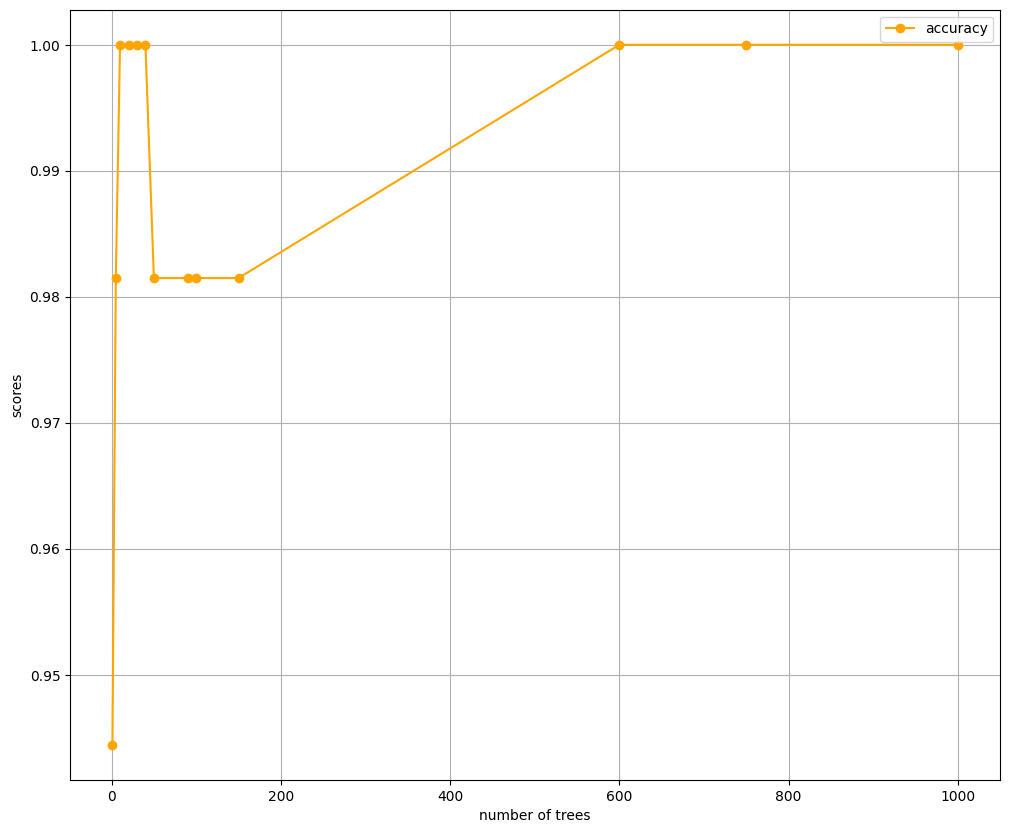

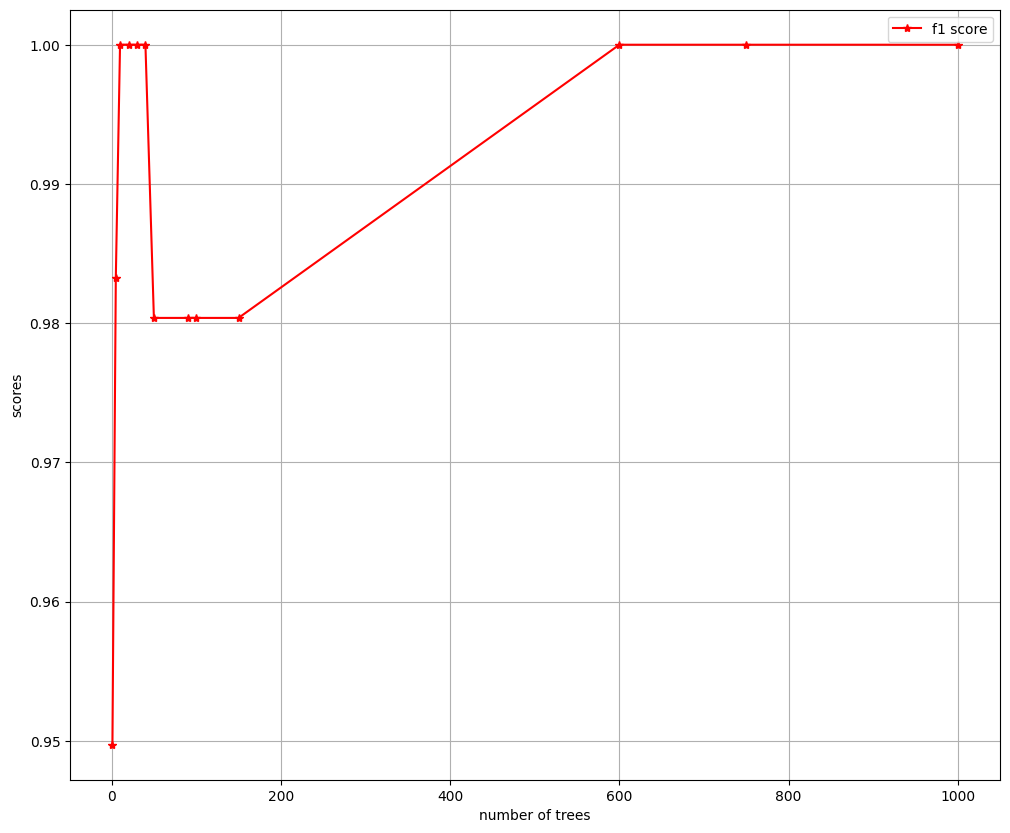

In [4]:
#3
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score
import matplotlib.pyplot as plt

# === Load dataset ===
data = load_wine()
x = StandardScaler().fit_transform(data.data)
y = data.target

# === Load your dataset ===
# df = pd.read_csv('your_data.csv')
# Separate features and target:
# x = df.drop('target_column_name', axis=1).values
# y = df['target_column_name'].values

trees=[1,5,10,20,30,40,50,90,100,150,600,750,1000]
acc=[]
f1=[]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

for n in trees:
  model=RandomForestClassifier(n_estimators=n,random_state=1)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  f1s=f1_score(y_test,y_pred,average='macro')
  print(f"Trees : {n:<3} | accuracy : {accuracy:.4f}, f1 : {f1s:.4f}")
  acc.append(accuracy)
  f1.append(f1s)



plt.figure(figsize=(12,10))
plt.plot(trees,acc,label='accuracy',color='orange',marker='o')
plt.legend()
plt.xlabel("number of trees")
plt.ylabel("scores")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,10))
plt.plot(trees,f1,label='f1 score',color='red',marker='*')
plt.legend()
plt.xlabel("number of trees")
plt.ylabel("scores")
plt.grid(True)



Checking for null values:
 Feature    0
Target     0
dtype: int64

Data types:
 Feature    float64
Target     float64
dtype: object

Statistical summary:
           Feature      Target
count  100.000000  100.000000
mean     2.675452    9.362461
std      0.743724    2.753708
min      1.513805    4.071862
25%      1.983002    7.135298
50%      2.660356    9.153276
75%      3.325508   11.501688
max      3.967217   15.600817
===== Model Evaluation =====
Root Mean Squared Error (RMSE): 1.2278
R² Score: 0.7511


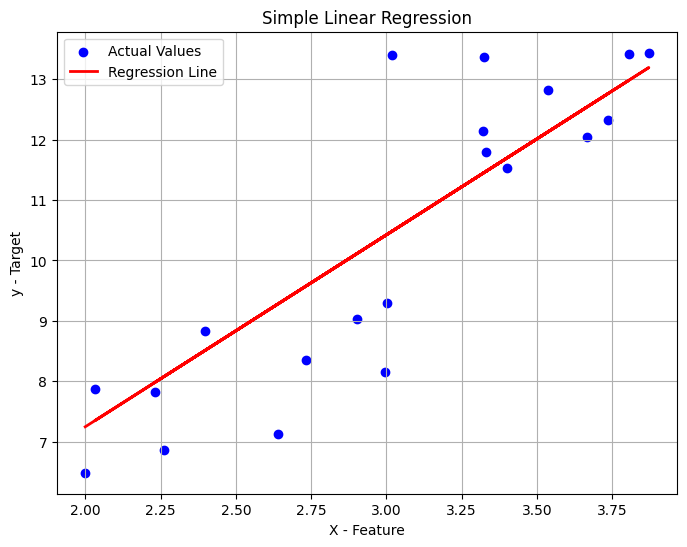

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------
# 1. Create a synthetic dataset
# ---------------------------------------------
np.random.seed(42)
X = 2.5 * np.random.rand(100, 1) + 1.5   # Feature values in range [1.5, 4.0]
y = 3.5 * X + np.random.randn(100, 1) * 1.5  # Target with noise

y = y.ravel()  # Flatten y to 1D

# ---- Create DataFrame ----
df = pd.DataFrame({
    'Feature': X.flatten(),
    'Target': y
})

# --- Step Preprocessing ---
print("\nChecking for null values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nStatistical summary:\n", df.describe())

# ---------------------------------------------
# 2. Train-Test Split
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ---------------------------------------------
# 3. Train the Linear Regression model
# ---------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------------------------
# 4. Make predictions
# ---------------------------------------------
y_pred = model.predict(X_test)

# ---------------------------------------------
# 5. Evaluation metrics
# ---------------------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== Model Evaluation =====")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# ---------------------------------------------
# 6. Visualize the regression line
# ---------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X - Feature")
plt.ylabel("y - Target")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


Missing values: 0
Target classes: [0 1]


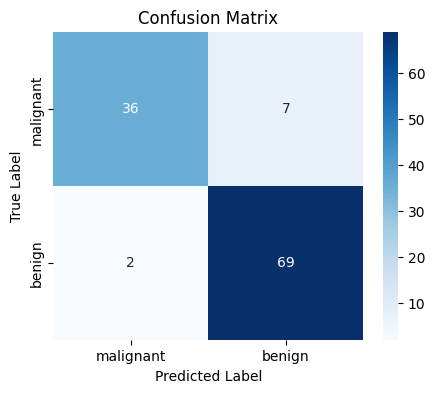


r2_score: 0.6639
accuracy_score: 0.9211
precision_score: 0.9079
recall_score: 0.9718
mean_squared_error: 0.0789


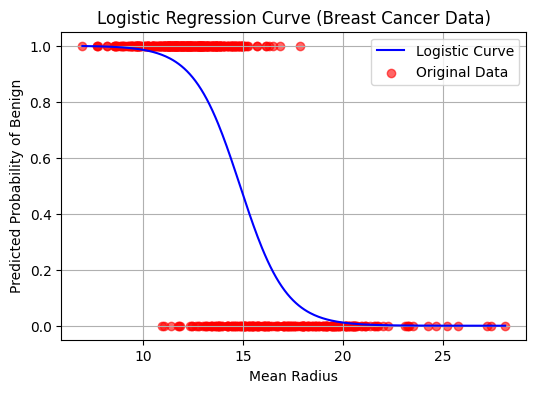

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    r2_score, confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, mean_squared_error
)
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------
# 1. Load Breast Cancer dataset
# ---------------------------------------------
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Use only one feature ('mean radius' -> index 0)
x = X[:, 0].reshape(-1, 1)  # 'mean radius'

# ---------------------------------------------
# 2. Preprocessing
# ---------------------------------------------
df = pd.DataFrame(X, columns=feature_names)
print("Missing values:", df.isnull().sum().sum())
print("Target classes:", np.unique(y))

# ---------------------------------------------
# 3. Train-test split
# ---------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ---------------------------------------------
# 4. Standardize features
# ---------------------------------------------
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# ---------------------------------------------
# 5. Logistic Regression model
# ---------------------------------------------
model = LogisticRegression()
model.fit(x_train, y_train)

# ---------------------------------------------
# 6. Prediction
# ---------------------------------------------
y_pred = model.predict(x_test)

# ---------------------------------------------
# 7. Confusion Matrix - Color Format
# ---------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---------------------------------------------
# 8. Metrics
# ---------------------------------------------
print(f"\nr2_score: {r2_score(y_test, y_pred):.4f}")
print(f"accuracy_score: {accuracy_score(y_test, y_pred):.4f}")
print(f"precision_score: {precision_score(y_test, y_pred):.4f}")
print(f"recall_score: {recall_score(y_test, y_pred):.4f}")
print(f"mean_squared_error: {mean_squared_error(y_test, y_pred):.4f}")

# ---------------------------------------------
# 9. Logistic regression curve
# ---------------------------------------------
x_plot = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_plot_scaled = scaler.transform(x_plot)
y_plot = model.predict_proba(x_plot_scaled)[:, 1]

plt.figure(figsize=(6, 4))
plt.plot(x_plot, y_plot, label="Logistic Curve", color="blue")
plt.scatter(x, y, color="red", label="Original Data", alpha=0.6)
plt.xlabel("Mean Radius")
plt.ylabel("Predicted Probability of Benign")
plt.title("Logistic Regression Curve (Breast Cancer Data)")
plt.legend()
plt.grid(True)
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Accuracy Score: 0.8


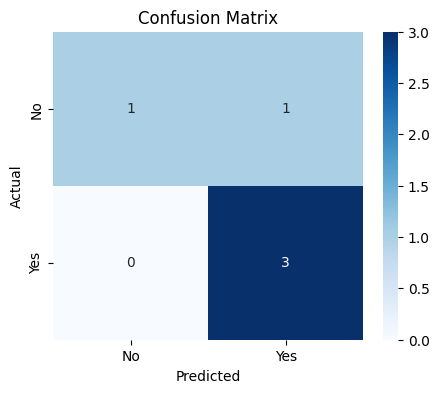


New Prediction (Buys Computer): Yes


In [ ]:
#6
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Create synthetic dataset
data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60, 24, 23, 34, 31, 40, 43, 51],
    'Income': ['Low', 'Low', 'High', 'High', 'High', 'High', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'High', 'Medium', 'High'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Excellent'],
    'Buys_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Save to CSV
#df.to_csv("naive_bayes_dataset.csv", index=False)
#print("Dataset saved to 'naive_bayes_dataset.csv'")


# STEP 2: Load dataset and preprocess
#df = pd.read_csv("naive_bayes_dataset.csv")

# Encode categorical features
le_income = LabelEncoder()
df['Income'] = le_income.fit_transform(df['Income'])      # Low=1, Medium=2, High=0 (varies)

le_student = LabelEncoder()
df['Student'] = le_student.fit_transform(df['Student'])    # No=0, Yes=1

le_credit = LabelEncoder()
df['Credit_Rating'] = le_credit.fit_transform(df['Credit_Rating'])  # Fair=0, Excellent=1

le_buys = LabelEncoder()
df['Buys_Computer'] = le_buys.fit_transform(df['Buys_Computer'])  # No=0, Yes=1


# Features and target
X = df.drop('Buys_Computer', axis=1)
y = df['Buys_Computer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# STEP 3: Train Naive Bayes Classifier

model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


# STEP 4: Evaluation

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# STEP 5: Predict on New Test Data
# Format: [Age, Income, Student, Credit_Rating]
# Assume: Income=Medium, Student=Yes, Credit_Rating=Fair

new_data = pd.DataFrame({
    'Age': [28],
    'Income': le_income.transform(['Medium']), # Use the correct encoder for Income
    'Student': le_student.transform(['Yes']),   # Use the correct encoder for Student
    'Credit_Rating': le_credit.transform(['Fair']) # Use the correct encoder for Credit_Rating
})

new_pred = model.predict(new_data)
print("\nNew Prediction (Buys Computer):", 'Yes' if new_pred[0] == 1 else 'No') # Use the correct encoder for the output label if needed for inverse_transform, but here we just print Yes/No based on the predicted integer


In [9]:
#7
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load and binarize diabetes target for classification
data = load_diabetes()
X, y = data.data, (data.target > 140).astype(int)  # 1 = diabetic, 0 = non-diabetic



# Normalize features
X = MinMaxScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Custom KNN function
def knn_predict(X_train, y_train, X_test, k=5, metric='euclidean'):
    preds = []
    for x in X_test:
        dists = np.linalg.norm(X_train - x, axis=1) if metric == 'euclidean' else np.sum(np.abs(X_train - x), axis=1)
        idx = np.argsort(dists)[:k]
        votes = y_train[idx]
        preds.append(np.bincount(votes).argmax())
    return np.array(preds)

# Try different K and metrics
for k in [3, 5, 7]:
    for metric in ['euclidean', 'manhattan']:
        y_pred = knn_predict(X_train, y_train, X_test, k, metric)
        acc = accuracy_score(y_test, y_pred)
        print(f"K={k}, Metric={metric}, Accuracy={acc:.2f}")

K=3, Metric=euclidean, Accuracy=0.67
K=3, Metric=manhattan, Accuracy=0.70
K=5, Metric=euclidean, Accuracy=0.68
K=5, Metric=manhattan, Accuracy=0.70
K=7, Metric=euclidean, Accuracy=0.68
K=7, Metric=manhattan, Accuracy=0.77


Initial shape: (768, 9)
Missing values: 29

K=3, Metric=euclidean
Confusion Matrix:
 [[85 15]
 [24 30]]
Accuracy: 0.7468, Precision: 0.6667, Recall: 0.5556, F1 Score: 0.6061

K=3, Metric=manhattan
Confusion Matrix:
 [[85 15]
 [23 31]]
Accuracy: 0.7532, Precision: 0.6739, Recall: 0.5741, F1 Score: 0.6200

K=5, Metric=euclidean
Confusion Matrix:
 [[86 14]
 [27 27]]
Accuracy: 0.7338, Precision: 0.6585, Recall: 0.5000, F1 Score: 0.5684

K=5, Metric=manhattan
Confusion Matrix:
 [[85 15]
 [24 30]]
Accuracy: 0.7468, Precision: 0.6667, Recall: 0.5556, F1 Score: 0.6061

K=7, Metric=euclidean
Confusion Matrix:
 [[85 15]
 [26 28]]
Accuracy: 0.7338, Precision: 0.6512, Recall: 0.5185, F1 Score: 0.5773

K=7, Metric=manhattan
Confusion Matrix:
 [[86 14]
 [24 30]]
Accuracy: 0.7532, Precision: 0.6818, Recall: 0.5556, F1 Score: 0.6122

K=9, Metric=euclidean
Confusion Matrix:
 [[86 14]
 [24 30]]
Accuracy: 0.7532, Precision: 0.6818, Recall: 0.5556, F1 Score: 0.6122

K=9, Metric=manhattan
Confusion Matrix:

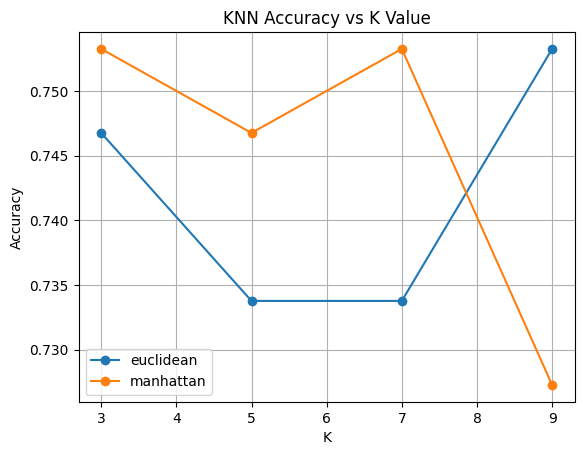


Best Accuracy: 0.7532 using K=3 and Metric=manhattan


In [13]:
#7(read this....nikhlesh's code)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Load dataset
df = pd.read_csv('7_diabetes1.csv')
print("Initial shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

# Step 2: Preprocessing - Fix 0s and missing values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

# Ensure 'Outcome' has no missing values
df = df.dropna(subset=['Outcome'])

# Step 3: Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Custom KNN implementation
def knn_predict(X_train, y_train, X_test, k=5, distance='euclidean'):
    preds = []
    for test_point in X_test:
        if distance == 'euclidean':
            dists = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        elif distance == 'manhattan':
            dists = np.sum(np.abs(X_train - test_point), axis=1)
        else:
            raise ValueError("Only 'euclidean' or 'manhattan' supported.")
        neighbors = y_train[np.argsort(dists)[:k]]
        vote = Counter(neighbors).most_common(1)[0][0]
        preds.append(vote)
    return np.array(preds)

# Step 6: Try different K and distance metrics
results = []
for k in [3, 5, 7, 9]:
    for metric in ['euclidean', 'manhattan']:
        y_pred = knn_predict(X_train, y_train, X_test, k=k, distance=metric)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append({'K': k, 'Metric': metric, 'Accuracy': acc,
                        'Precision': prec, 'Recall': rec, 'F1': f1})
        print(f"\nK={k}, Metric={metric}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

# Step 7: Plot accuracy vs k
df_result = pd.DataFrame(results)
for metric in ['euclidean', 'manhattan']:
    subset = df_result[df_result['Metric'] == metric]
    plt.plot(subset['K'], subset['Accuracy'], marker='o', label=f'{metric}')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Best setting
best = df_result.sort_values(by='Accuracy', ascending=False).iloc[0]
print(f"\nBest Accuracy: {best['Accuracy']:.4f} using K={best['K']} and Metric={best['Metric']}")

Null values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dataset statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


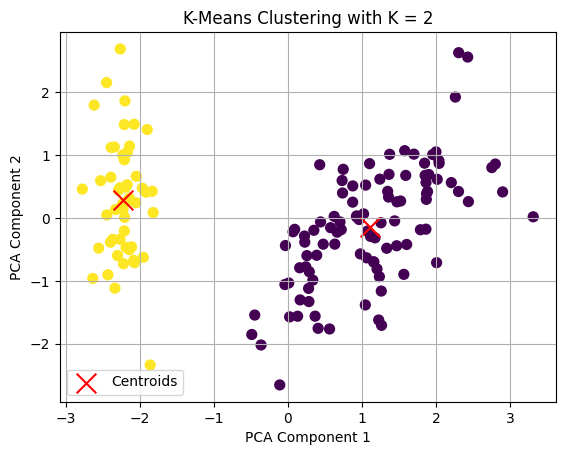

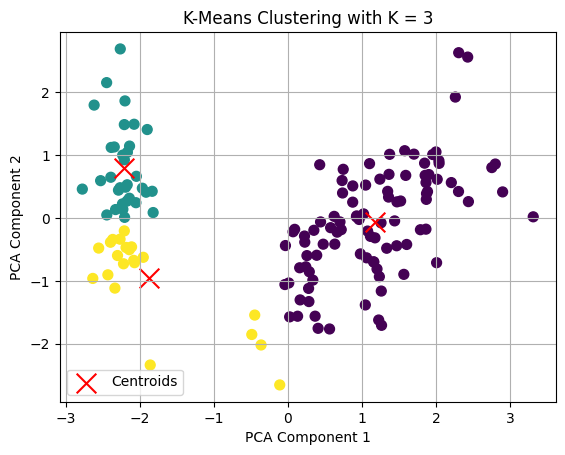

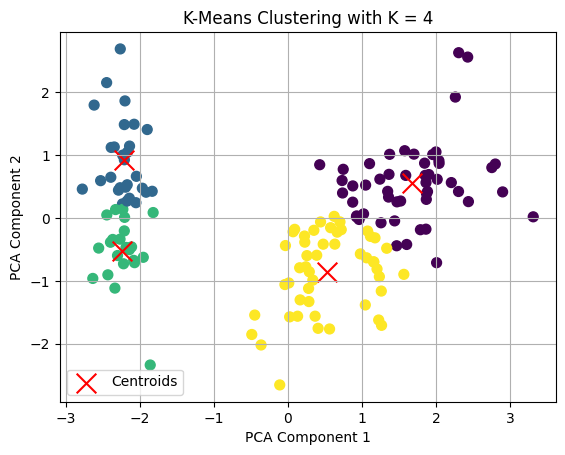


--- K-Means Clustering Performance Comparison ---
   K  Inertia (SSE)  Silhouette Score
0  2     222.361705          0.581750
1  3     191.024737          0.479881
2  4     114.354072          0.385045

--- Inference / Analysis ---
1. Dataset: Iris (unsupervised; true labels not used).
2. Data was preprocessed via standardization and reduced to 2D with PCA for visualization.
3. K-Means was applied for K = 2, 3, 4.
4. Inertia (SSE) decreased with higher K, indicating tighter clusters.
5. Silhouette Score peaked at K = 2 or 3, suggesting optimal compactness and separation.
6. PCA plots show distinct clusters, especially for K = 3, which aligns with true Iris species.
7. K = 3 is likely optimal for this dataset based on visual and metric analysis.


In [14]:
#8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Step 1: Load Dataset ---
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# --- Step 2: Preprocessing ---
print("Null values in dataset:\n", df.isnull().sum())
print("\nDataset statistics:\n", df.describe())

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# --- Step 3: K-Means Clustering for K = 2, 3, 4 ---
k_values = [2, 3, 4]
results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Save metrics
    results[k] = {
        "model": kmeans,
        "clusters": clusters,
        "inertia": kmeans.inertia_,
        "silhouette": silhouette_score(scaled_data, clusters)
    }

    # --- Step 4: Visualization ---
    plt.figure()
    plt.title(f"K-Means Clustering with K = {k}")
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Step 5: Compare Cluster Performance ---
print("\n--- K-Means Clustering Performance Comparison ---")
comparison_df = pd.DataFrame({
    "K": k_values,
    "Inertia (SSE)": [results[k]["inertia"] for k in k_values],
    "Silhouette Score": [results[k]["silhouette"] for k in k_values]
})
print(comparison_df)

# --- Step 6: Inference / Analysis ---
print("\n--- Inference / Analysis ---")
print("1. Dataset: Iris (unsupervised; true labels not used).")
print("2. Data was preprocessed via standardization and reduced to 2D with PCA for visualization.")
print("3. K-Means was applied for K = 2, 3, 4.")
print("4. Inertia (SSE) decreased with higher K, indicating tighter clusters.")
print("5. Silhouette Score peaked at K = 2 or 3, suggesting optimal compactness and separation.")
print("6. PCA plots show distinct clusters, especially for K = 3, which aligns with true Iris species.")
print("7. K = 3 is likely optimal for this dataset based on visual and metric analysis.")

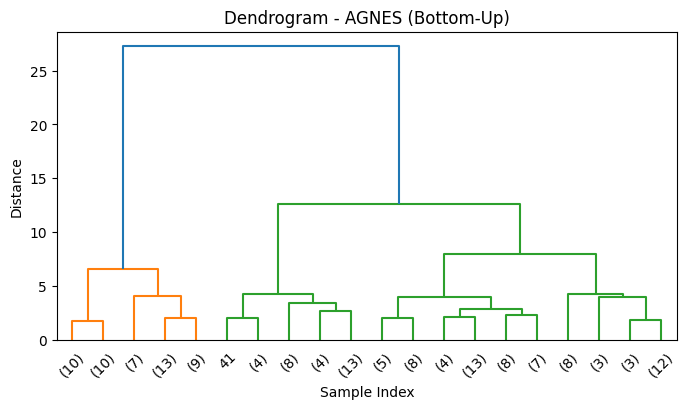

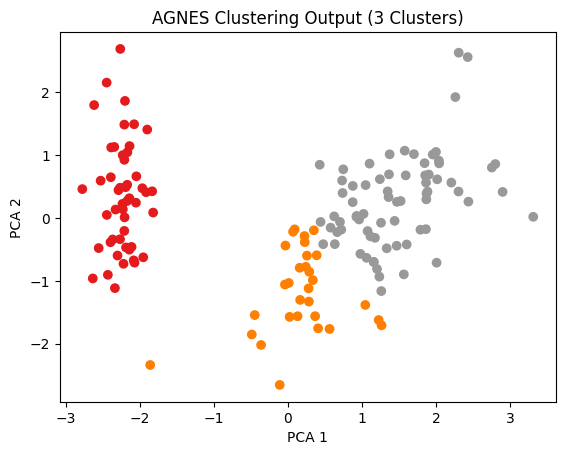

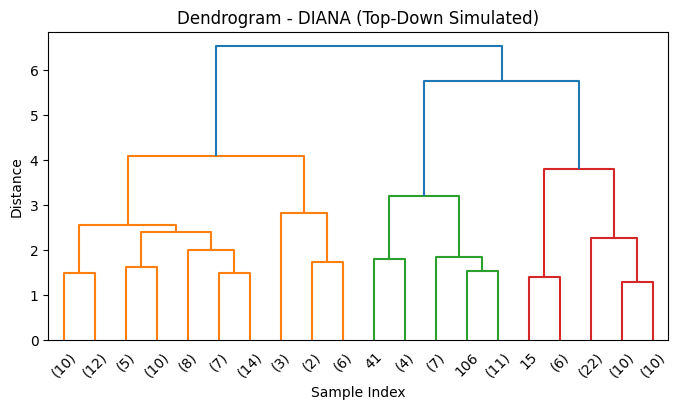

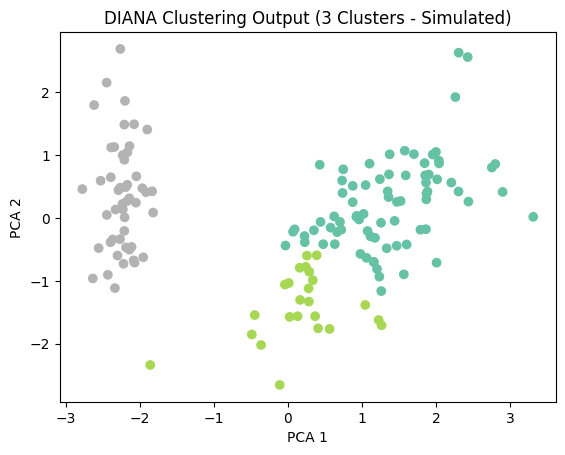


--- Inference / Analysis ---
1. Dataset used: Iris (without labels for unsupervised clustering).
2. AGNES (bottom-up) used 'ward' linkage to build clusters from individual points.
3. DIANA (top-down) was simulated using 'complete' linkage (splits largest clusters first).
4. Dendrograms visually show different clustering hierarchies.
5. PCA-based scatter plots show that AGNES forms tighter, compact clusters.
6. DIANA clusters are broader and may not align tightly with true classes.
7. AGNES generally works better with compact, spherical clusters like those in Iris.


In [16]:
#9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data
features = iris.feature_names

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- AGNES (Bottom-Up) ---
link_agnes = linkage(X_scaled, method='ward')  # 'ward' for minimum variance
plt.figure(figsize=(8, 4))
dendrogram(link_agnes, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title("Dendrogram - AGNES (Bottom-Up)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cut dendrogram to get 3 clusters
labels_agnes = fcluster(link_agnes, t=3, criterion='maxclust')

# Plot AGNES clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agnes, cmap='Set1')
plt.title("AGNES Clustering Output (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# --- DIANA (Simulated Top-Down using complete linkage) ---
link_diana = linkage(X_scaled, method='complete')  # simulate divisive behavior
plt.figure(figsize=(8, 4))
dendrogram(link_diana, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title("Dendrogram - DIANA (Top-Down Simulated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cut to get 3 clusters
labels_diana = fcluster(link_diana, t=3, criterion='maxclust')

# Plot DIANA clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_diana, cmap='Set2')
plt.title("DIANA Clustering Output (3 Clusters - Simulated)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# --- Inference ---
print("\n--- Inference / Analysis ---")
print("1. Dataset used: Iris (without labels for unsupervised clustering).")
print("2. AGNES (bottom-up) used 'ward' linkage to build clusters from individual points.")
print("3. DIANA (top-down) was simulated using 'complete' linkage (splits largest clusters first).")
print("4. Dendrograms visually show different clustering hierarchies.")
print("5. PCA-based scatter plots show that AGNES forms tighter, compact clusters.")
print("6. DIANA clusters are broader and may not align tightly with true classes.")
print("7. AGNES generally works better with compact, spherical clusters like those in Iris.")


--- AdaBoost ---
Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9859
F1-Score:  0.9790
ROC AUC:   0.9944


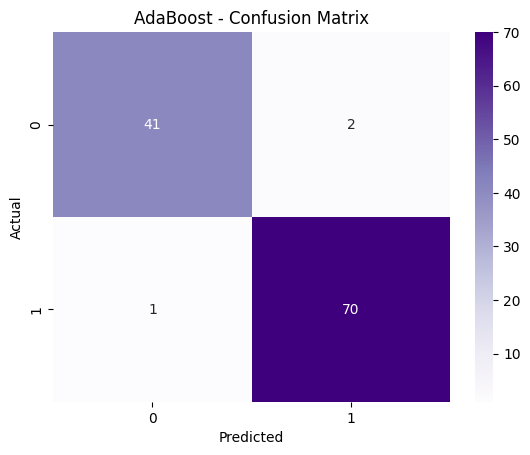


--- XGBoost ---
Accuracy:  0.9561
Precision: 0.9583
Recall:    0.9718
F1-Score:  0.9650
ROC AUC:   0.9908


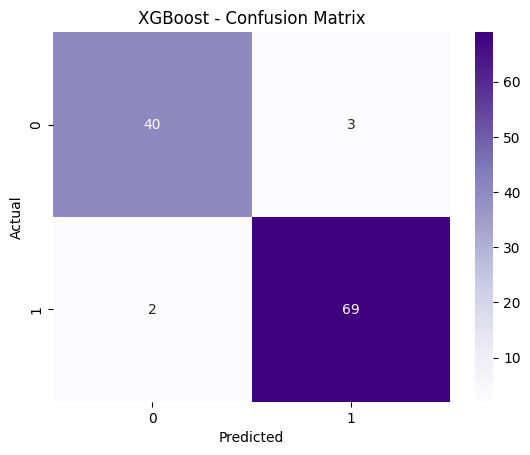

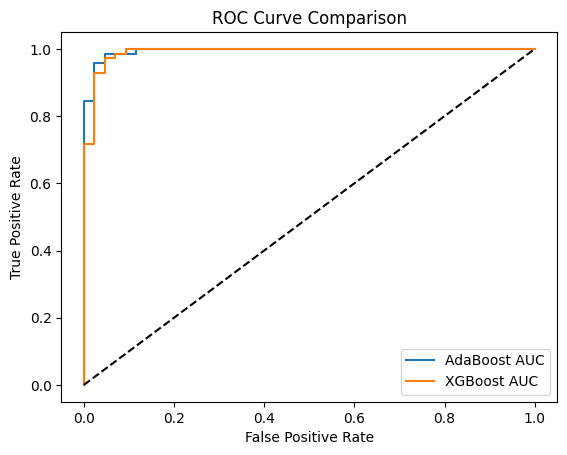

In [17]:
#10
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, roc_curve)

# Load binary classification dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Train and predict
ada.fit(X_train, y_train)
xgb.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
xgb_pred = xgb.predict(X_test)
ada_prob = ada.predict_proba(X_test)[:, 1]
xgb_prob = xgb.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n--- {name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_prob):.4f}")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model("AdaBoost", y_test, ada_pred, ada_prob)
evaluate_model("XGBoost", y_test, xgb_pred, xgb_prob)

# Plot ROC Curves
fpr1, tpr1, _ = roc_curve(y_test, ada_prob)
fpr2, tpr2, _ = roc_curve(y_test, xgb_prob)
plt.plot(fpr1, tpr1, label='AdaBoost AUC')
plt.plot(fpr2, tpr2, label='XGBoost AUC')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()